In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_excel("D:\\data\\Final_Train.xlsx")
print(train.shape)
test=pd.read_excel("D:\\data\Final_test.xlsx")
print(test.shape)
train.head()

(5961, 7)
(1987, 6)


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
test.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
flist=[train,test]
for i in flist:
    i["Experience"]=i["Experience"].str.split().str[0].astype(int)

In [6]:
for i in flist:
    i["Rating"]=i["Rating"].replace(np.nan,"0%")
    i["Rating"]=i["Rating"].str.strip("%").astype(int)

In [7]:
for i in flist:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null int32
Rating                5961 non-null int32
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int32(2), int64(1), object(4)
memory usage: 279.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null int32
Rating                1987 non-null int32
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: int32(2), object(4)
memory usage: 77.7+ KB


In [8]:
for i in flist:
    print(i.isnull().sum())

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64
Qualification           0
Experience              0
Rating                  0
Place                   6
Profile                 0
Miscellaneous_Info    834
dtype: int64


In [9]:
train["Place"].value_counts()

HSR Layout, Bangalore       75
Andheri West, Mumbai        70
Dwarka, Delhi               67
Banjara Hills, Hyderabad    64
Mulund West, Mumbai         54
                            ..
e                            1
Beeramguda, Hyderabad        1
Chintalmet, Hyderabad        1
Durga Puri, Delhi            1
Ondipudur, Coimbatore        1
Name: Place, Length: 877, dtype: int64

In [10]:
for i in flist:
    i.Place.fillna('other,other',inplace=True)
    i['area'] = i['Place'].str.split(",").str[0]
    i['city'] = i['Place'].str.split(",").str[1]
    i.drop('Place',axis=1,inplace=True)

In [11]:
for i in flist:
    print(i.head(2))

                  Qualification  Experience  Rating    Profile  \
0         BHMS, MD - Homeopathy          24     100  Homeopath   
1  BAMS, MD - Ayurveda Medicine          12      98   Ayurveda   

                      Miscellaneous_Info  Fees        area        city  
0   100% 16 Feedback Kakkanad, Ernakulam   100    Kakkanad   Ernakulam  
1  98% 76 Feedback Whitefield, Bangalore   350  Whitefield   Bangalore  
                                Qualification  Experience  Rating  \
0                                        MBBS          35       0   
1  MBBS, Diploma in Otorhinolaryngology (DLO)          31       0   

            Profile Miscellaneous_Info              area        city  
0  General Medicine                NaN    Ghatkopar East      Mumbai  
1    ENT Specialist                NaN  West Marredpally   Hyderabad  


In [12]:
train["Qualification"]=train["Qualification"].str.split(",")
Qualification ={}
for x in train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [13]:
test["Qualification"]=test["Qualification"].str.split(",")
Qualification ={}
for x in train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [14]:
mqual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
fqual = []
for qual in mqual:
    fqual.append(qual[0])
    
print(fqual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [15]:
for qual in fqual:
    train[qual] = 0

for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in fqual:
            train[c][y] = 1

In [16]:
for qual in fqual:
    test[qual] = 0

for x,y in zip(test['Qualification'].values, np.array([i for i in range(len(test))])):
    for c in x:
        c = c.strip()
        if c in fqual:
            test[c][y] = 1

In [17]:
test.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,area,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,[MBBS],35,0,General Medicine,NaN,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,0,ENT Specialist,NaN,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0


In [18]:
train.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,area,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0


In [19]:
train.drop(columns=["Miscellaneous_Info","Qualification","area"],inplace=True)

In [20]:
test.drop(columns=["Miscellaneous_Info","Qualification","area"],inplace=True)

In [21]:
train.head()

,Experience,Rating,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


In [22]:
test.head()

,Experience,Rating,Profile,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,35,0,General Medicine,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,0,ENT Specialist,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,70,Dermatologists,Chennai,1,0,0,0,0,0,0,0,0,0
3,0,0,Ayurveda,Delhi,0,0,1,0,0,0,0,0,0,0
4,16,100,Dentist,Bangalore,0,1,0,0,0,0,0,0,0,0


In [23]:
train.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Fees                                    0
city                                    1
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

to remove nan value in city column

In [24]:
for i in flist:
    i["city"].replace("Sector 5","Delhi")
    i.drop(columns=["city"],inplace=True)

data visualization

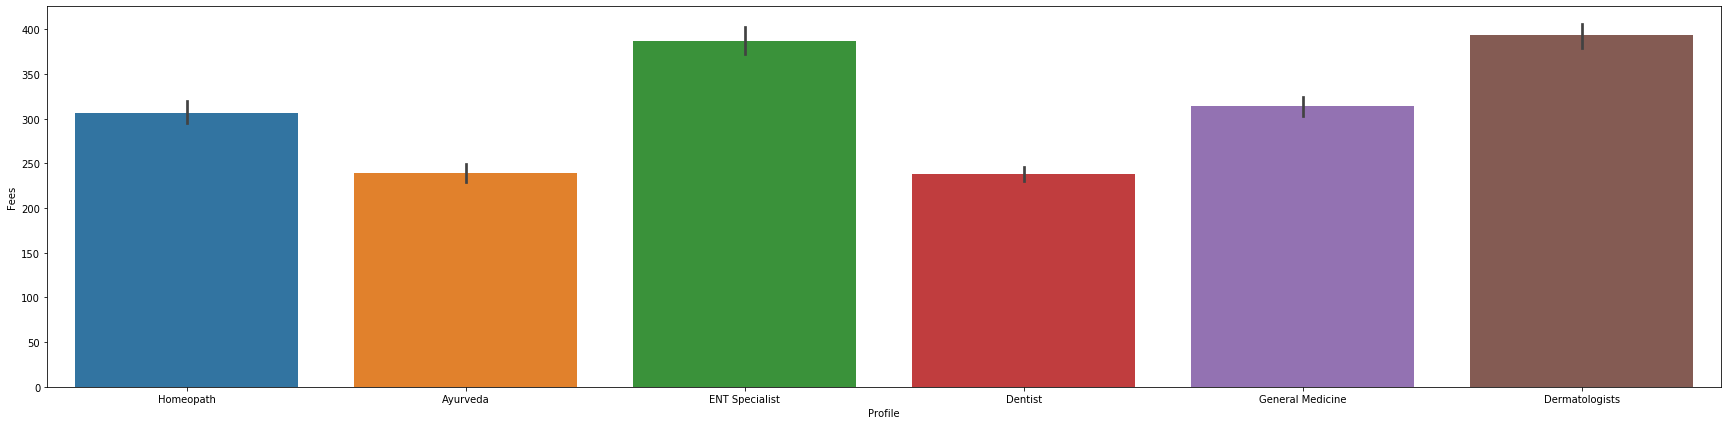

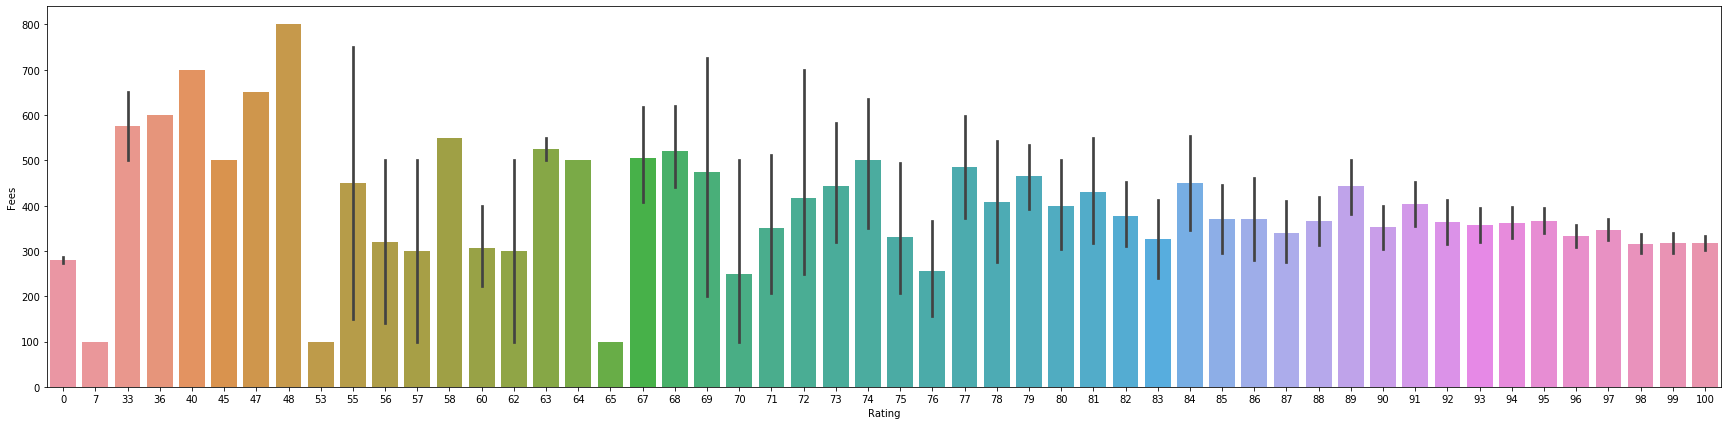

In [25]:
for i in ["Profile","Rating"]:
    plt.figure(figsize=(30,7))
    sns.barplot(train[i],train["Fees"])
    plt.show()

the above graph shows that (Dermatologist,ENT Specialist) are getting HIGH fees than others if they locate at delhi it would be even higher fees

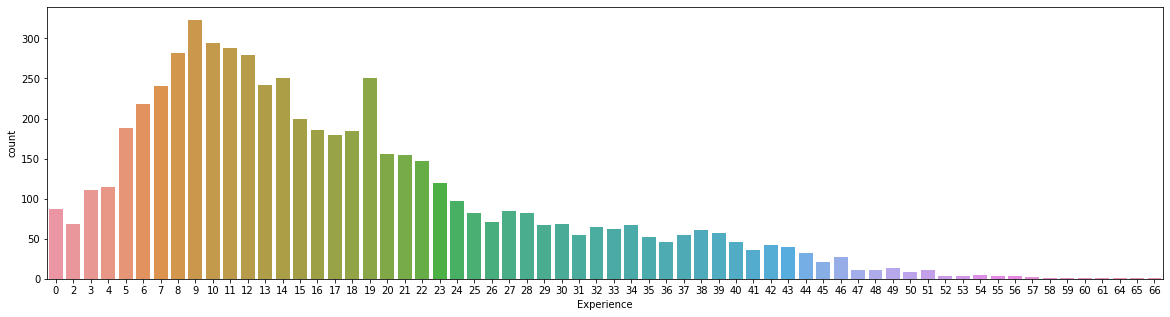

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(train["Experience"])
plt.show()

the above graph shows that most of docters are at experience leval from 5 to 22 

less docters are continue work after 46 years of experience

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 14 columns):
Experience                              5961 non-null int32
Rating                                  5961 non-null int32
Profile                                 5961 non-null object
Fees                                    5961 non-null int64
MBBS                                    5961 non-null int64
BDS                                     5961 non-null int64
BAMS                                    5961 non-null int64
BHMS                                    5961 non-null int64
MD - Dermatology                        5961 non-null int64
MS - ENT                                5961 non-null int64
Venereology & Leprosy                   5961 non-null int64
MD - General Medicine                   5961 non-null int64
Diploma in Otorhinolaryngology (DLO)    5961 non-null int64
MD - Homeopathy                         5961 non-null int64
dtypes: int32(2), int64(11), object(1)
memory usage:

In [28]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for c in train.loc[:,train.dtypes=="object"]:
    train[c]=lr.fit_transform(train[c])

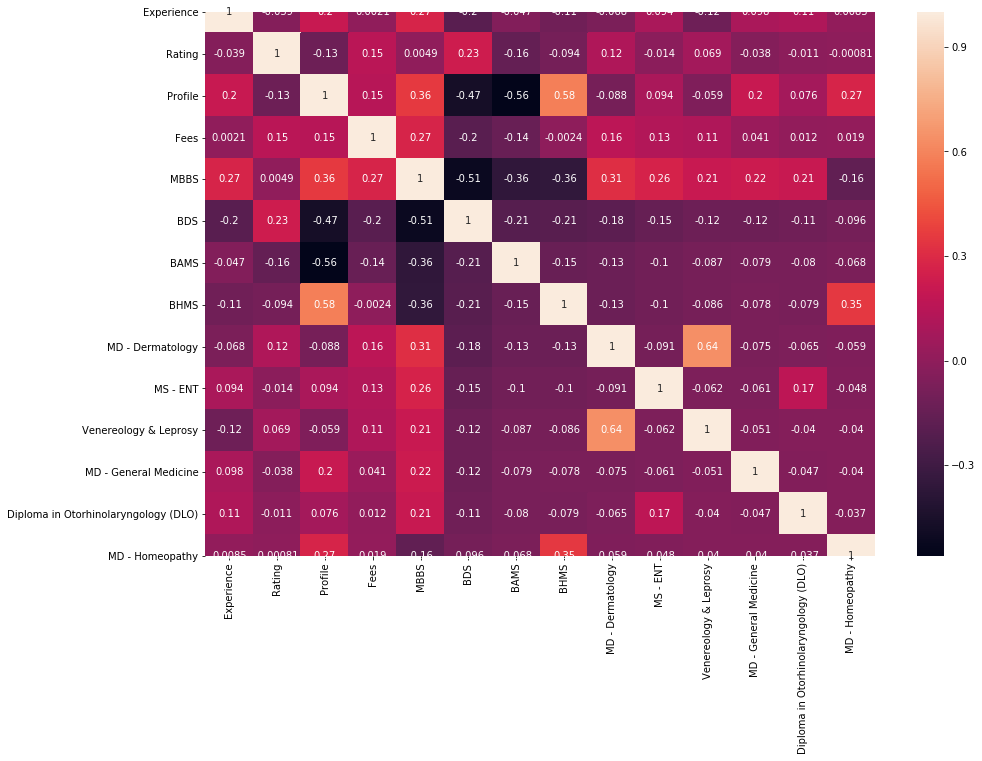

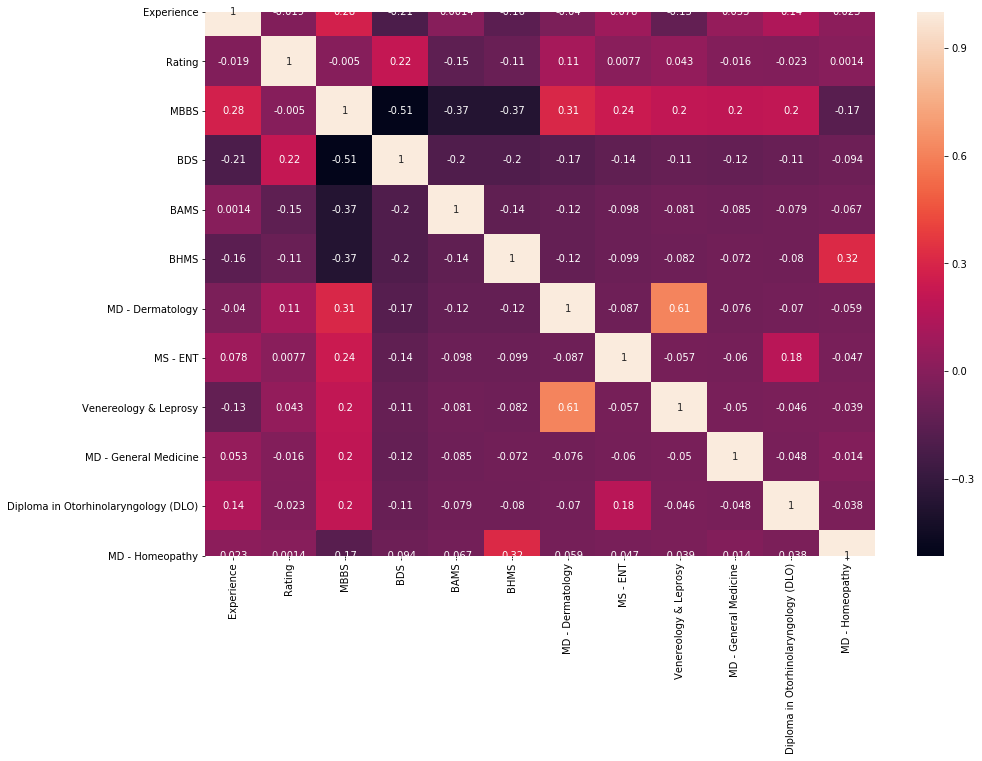

In [29]:
for i in flist:
    plt.figure(figsize=(15,10))
    sns.heatmap(i.corr(),annot=True)
    plt.show()

In [30]:
print(train.shape)
print(test.shape)

(5961, 14)
(1987, 13)


To seperate input and output values for test and train data

In [33]:
x=train.drop(columns=["Fees"])
y=train["Fees"]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [35]:
def metrics(a,b):
    print("r2 score : ",r2_score(a,b))
    print("mean_squared_error : ",mean_squared_error(a,b))
    print("mean_absolute_error : ",mean_absolute_error(a,b))

In [36]:
def model(mod,x1,y1,x2,y2):
    mod.fit(x1,y1)
    pred=mod.predict(x2)
    metrics(y2,pred)

to find best random state

In [37]:
max_acc=0
best_rand=0
for i in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    acc=r2_score(ytest,pred)
    if acc>max_acc:
        max_acc=acc
        best_rand=i
print("max_acc = ",max_acc,"best rand = ",best_rand)

max_acc =  0.16131405606331362 best rand =  108


In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=0)
from sklearn.model_selection import cross_val_score
print("cross_val_score : ",cross_val_score(DecisionTreeRegressor(),x,y,cv=4).mean())
model(DecisionTreeRegressor(),xtrain,ytrain,xtest,ytest)

cross_val_score :  -0.3107762910531744
r2 score :  -0.23817349055158132
mean_squared_error :  47390.08896426288
mean_absolute_error :  164.84292911167316


In [39]:
print("cross_val_score : ",cross_val_score(SVR(),x,y,cv=4).mean())
model(SVR(),xtrain,ytrain,xtest,ytest)

cross_val_score :  0.03170465539562442
r2 score :  0.022950946705407094
mean_squared_error :  37395.76231554819
mean_absolute_error :  154.7442157367725


In [40]:
print("cross_val_score : ",cross_val_score(KNeighborsRegressor(),x,y,cv=4).mean())
model(KNeighborsRegressor(),xtrain,ytrain,xtest,ytest)

cross_val_score :  -0.016241625794458314
r2 score :  0.0196267630698278
mean_squared_error :  37522.99275572945
mean_absolute_error :  151.59206260480715


In [41]:
print("cross_val_score : ",cross_val_score(AdaBoostRegressor(),x,y,cv=4).mean())
model(AdaBoostRegressor(),xtrain,ytrain,xtest,ytest)

cross_val_score :  0.1109239034557607
r2 score :  0.11707801628837677
mean_squared_error :  33793.12485357576
mean_absolute_error :  152.89950234300085


In [42]:
print("cross_val_score : ",cross_val_score(RandomForestRegressor(),x,y,cv=4).mean())
model(RandomForestRegressor(),xtrain,ytrain,xtest,ytest)

cross_val_score :  -0.05368593561226148
r2 score :  -0.017635940524406202
mean_squared_error :  38949.192599172275
mean_absolute_error :  153.57984232715359
